In [104]:
#Importation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats as st
with open('df_complete.pickle', 'rb') as f:
    df = pickle.load(f)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 919
Data columns (total 14 columns):
age         918 non-null float64
sex         918 non-null float64
cp          918 non-null float64
trestbps    918 non-null float64
chol        918 non-null float64
fbs         918 non-null float64
restecg     918 non-null float64
thalach     918 non-null float64
exang       918 non-null float64
oldpeak     918 non-null float64
slope       918 non-null float64
thal        918 non-null float64
num         918 non-null int64
fork_age    918 non-null float64
dtypes: float64(13), int64(1)
memory usage: 107.6 KB


In [ ]:
#Distribution des attributs

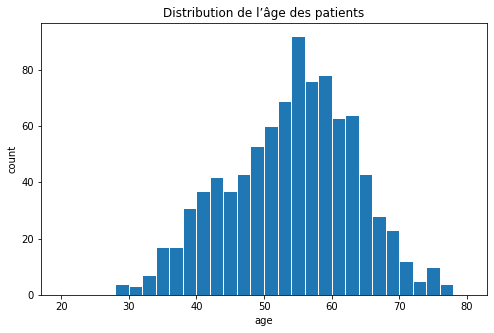

In [20]:
bins = np.linspace(20, 80, 31)
figure, axis = plt.subplots(figsize=(8,5))
axis.set_xlabel("age")
axis.set_ylabel("count")
plt.hist(df["age"],bins,range=(20, 80),ec='white')
plt.title("Distribution de l’âge des patients")
plt.show()

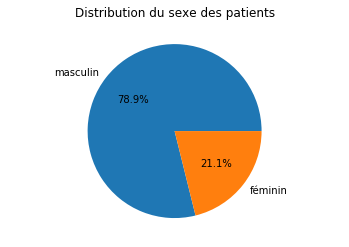

1.0    724
0.0    194
Name: sex, dtype: int64


In [22]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(df['sex'].value_counts(), labels = ["masculin","féminin"], autopct='%1.1f%%')
plt.title("Distribution du sexe des patients")
plt.show()
print(df['sex'].value_counts())

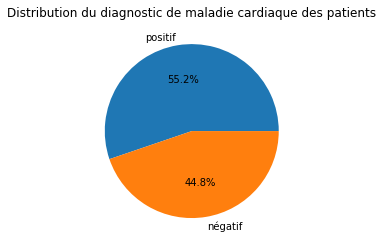

1    507
0    411
Name: num, dtype: int64


In [23]:
fig, ax = plt.subplots()
ax.axis("equal")
ax.pie(df['num'].value_counts(), labels = ["positif","négatif"], autopct='%1.1f%%')
plt.title("Distribution du diagnostic de maladie cardiaque des patients")
plt.show()
print(df['num'].value_counts())

[Text(0, 0, 'féminin'), Text(0, 0, 'masculin')]

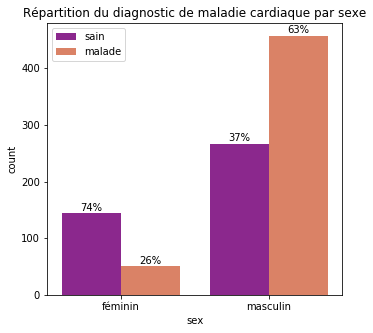

In [42]:
fig,ax=plt.subplots(figsize=(18,5))
plt.subplot(1, 3, 1)
ax=sns.countplot(x='sex',data=df ,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 5, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 5, '{0:.0%}'.format(height_r/total), ha="center")
ax.set_title("Répartition du diagnostic de maladie cardiaque par sexe")
ax.legend(["sain","malade"])
ax.set_xticklabels(["féminin","masculin"])

[Text(0, 0, 'féminin'), Text(0, 0, 'masculin')]

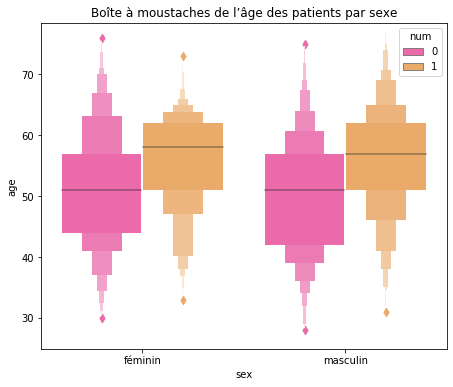

In [113]:
fig,ax=plt.subplots(figsize=(16,6))
plt.subplot(121)
ax=sns.boxenplot(x='sex',y='age',hue='num', data=df, palette='spring')
ax.set_title("Boîte à moustaches de l’âge des patients par sexe")
#ax.legend(["sain","malade"])
ax.set_xticklabels(["féminin","masculin"])

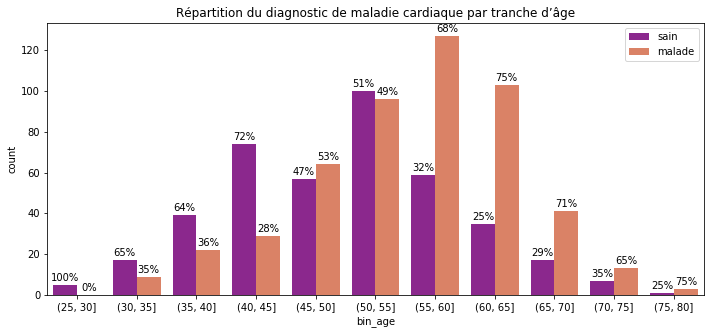

In [58]:
fig,ax=plt.subplots(figsize=(40,5))
plt.subplot(1, 3, 1)
age_bins = [25,30,35,40,45,50,55,60,65,70,75,80]
df['bin_age']=pd.cut(df['age'], bins=age_bins)
ax=sns.countplot(x='bin_age',data=df ,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 2, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 2, '{0:.0%}'.format(height_r/total), ha="center")
ax.set_title("Répartition du diagnostic de maladie cardiaque par tranche d’âge")
ax.legend(["sain","malade"])

In [95]:
#Normalisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df)
df = pd.DataFrame({'age': data[:, 0], 'sex': data[:, 1], 'cp': data[:, 2], 'trestbps': data[:, 3],
                  'chol': data[:, 4], 'fbs': data[:, 5], 'restecg': data[:, 6], 'thalach': data[:, 7],
                  'exang': data[:, 8], 'oldpeak': data[:, 9], 'slope': data[:, 10], 'thal': data[:, 11],
                  'num': data[:, 12], 'fork_age': data[:, 13]})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num,fork_age
0,1.007816,0.517644,-2.419336,0.688498,0.308929,2.377430,1.628532,0.427943,-0.770552,1.352622,2.229400,0.455214,-1.110665,1.208816
1,1.433184,0.517644,0.805665,1.500999,0.795586,-0.420622,1.628532,-1.201502,1.297771,0.596607,0.300475,-1.144861,0.900362,1.208816
2,1.433184,0.517644,0.805665,-0.665669,0.272200,-0.420622,1.628532,-0.386780,1.297771,1.636127,0.300475,0.988572,0.900362,1.208816
3,-1.757076,0.517644,-0.269336,-0.124002,0.465026,-0.420622,-0.685698,1.863405,-0.770552,2.486644,2.229400,-1.144861,-1.110665,-1.862290
4,-1.331708,-1.931828,-1.344336,-0.124002,0.042645,-0.420622,1.628532,1.281461,-0.770552,0.502105,-1.628450,-1.144861,-1.110665,-0.838588


Text(0.5, 1, 'Matrice thermique de corrélation')

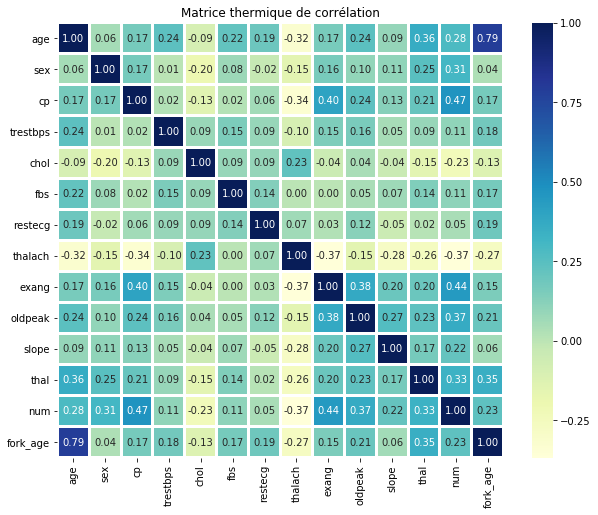

In [96]:
#Corrélation

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
plt.title("Matrice thermique de corrélation")

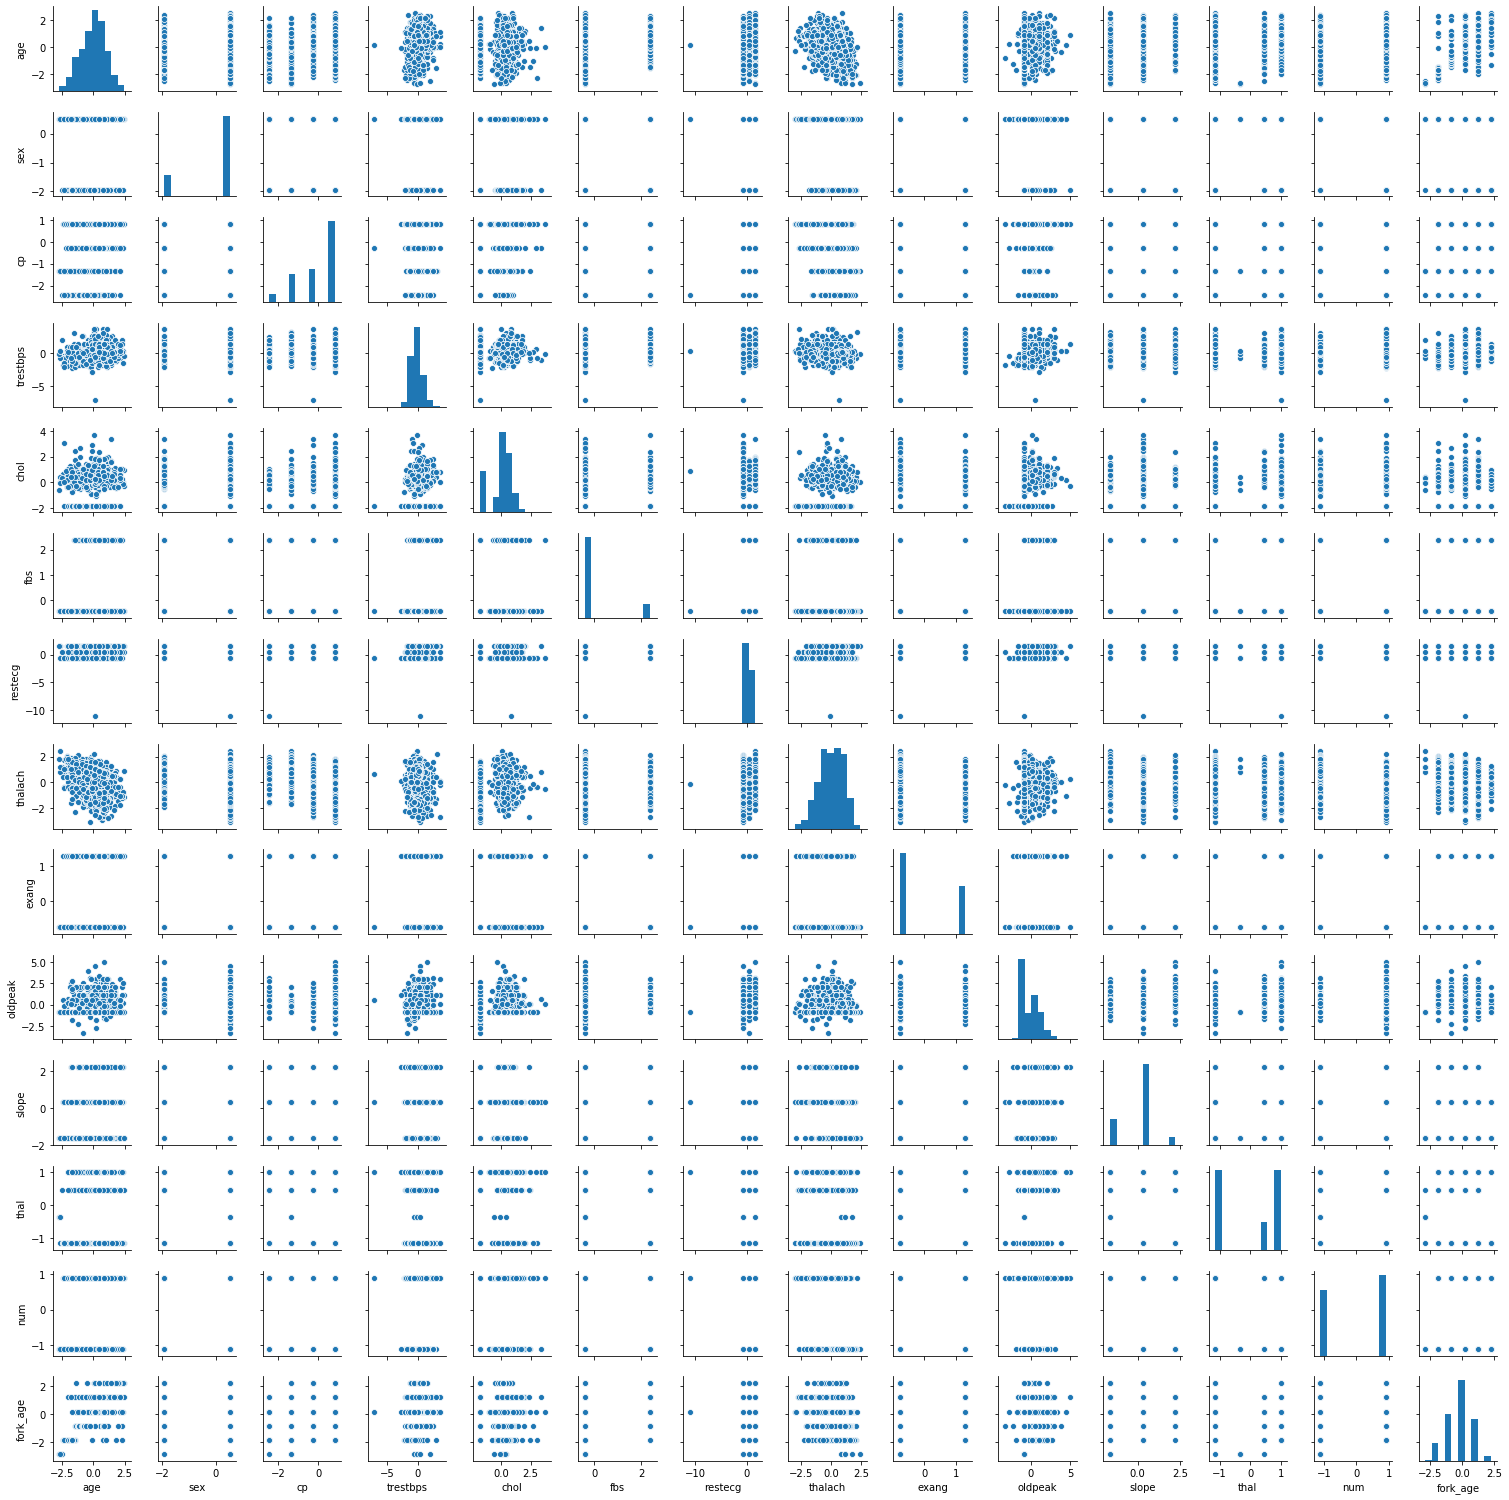

In [97]:
#Diagrammes de dispersion

sns.pairplot(df, height=1.5, aspect=1)

In [103]:
#IC95 de corrélation

def corr_IC95(DF):
    IC = np.ones((14, 14, 2))
    n=len(DF)
    for i in range(14):
        for j in range(14):
            if i!=j:
                correl_value=DF.iloc[i][j]
                Z = (np.log(1+correl_value)-np.log(1-correl_value))/2
                Zinf = Z - 1.96*np.sqrt(1/(n-3))
                Zsup = Z + 1.96*np.sqrt(1/(n-3))
                lower_bound = (np.exp(2*Zinf)-1) / (np.exp(2*Zinf)+1)
                upper_bound = (np.exp(2*Zsup)-1) / (np.exp(2*Zsup)+1)
                IC[i,j,0] = lower_bound
                IC[i,j,1] = upper_bound
    return IC

print(corr_IC95(df.corr()))

[[[ 1.          1.        ]
  [-0.48780254  0.5708291 ]
  [-0.39627246  0.64266765]
  [-0.33335778  0.68332406]
  [-0.59510112  0.45927882]
  [-0.35160298  0.67214897]
  [-0.37446184  0.65745732]
  [-0.72931151  0.24930301]
  [-0.40014326  0.6399594 ]
  [-0.32923373  0.6857857 ]
  [-0.45877702  0.59551158]
  [-0.2068883   0.74958456]
  [-0.28945404  0.70839473]
  [ 0.44914788  0.9309618 ]]

 [[-0.48780254  0.5708291 ]
  [ 1.          1.        ]
  [-0.3954923   0.64321037]
  [-0.5267018   0.53445064]
  [-0.66008436  0.37046448]
  [-0.4737826   0.58299504]
  [-0.54601963  0.51479503]
  [-0.63110955  0.41253845]
  [-0.40362559  0.63750066]
  [-0.45710126  0.59687831]
  [-0.44912161  0.60330356]
  [-0.3224697   0.68977346]
  [-0.26747218  0.72006754]
  [-0.50270765  0.55736435]]

 [[-0.39627246  0.64266765]
  [-0.3954923   0.64321037]
  [ 1.          1.        ]
  [-0.51280001  0.54791926]
  [-0.61990321  0.42769856]
  [-0.5152914   0.54554528]
  [-0.48562109  0.57275311]
  [-0.73502799  

Text(0.5, 1, 'Matrice thermique de détermination')

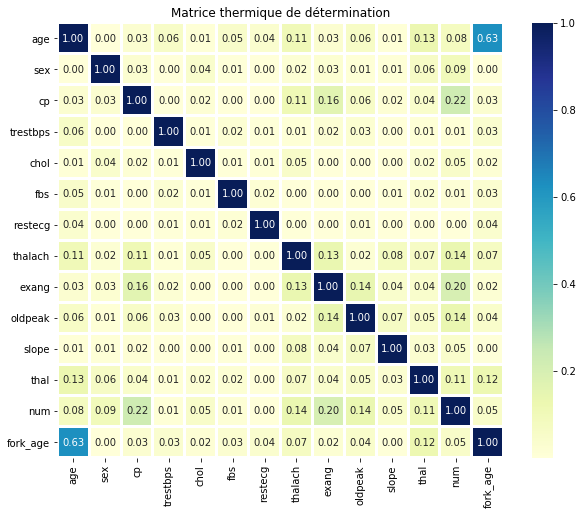

In [98]:
#Coefficients de détermination

plt.figure(figsize=(10,8))
sns.heatmap((df.corr())**2,annot=True,cmap='YlGnBu',fmt='.2f',linewidths=2)
plt.title("Matrice thermique des coefficients de détermination")

In [ ]:
#Test de chi-2

In [90]:
bins = [-0.5, 0.5, 1.5]
names = ['femme', 'homme']
names2 = ['sain', 'malade']
df['sex_name'] = pd.cut(df['sex'], bins, labels=names)
df['num_name'] = pd.cut(df['num'], bins, labels=names2)

CT = pd.crosstab(df["sex_name"],df["num_name"])
print(CT)
CTG = st.chi2_contingency(CT)
print(CTG)

num_name  sain  malade
sex_name              
femme      144      50
homme      267     457
(84.80912594664457, 3.2860415875307906e-20, 1, array([[ 86.85620915, 107.14379085],
       [324.14379085, 399.85620915]]))


In [91]:
bins = [0.5, 1.5, 2.5, 3.5, 4.5]
names = ["angine typique","angine atypique","non-anginal", "absence"]
bins2 = [-0.5, 0.5, 1.5]
names2 = ['sain', 'malade']
df['cp_name'] = pd.cut(df['cp'], bins, labels=names)
df['num_name'] = pd.cut(df['num'], bins2, labels=names2)

CT = pd.crosstab(df["cp_name"],df["num_name"])
print(CT)
CTG = st.chi2_contingency(CT)
print(CTG)

num_name         sain  malade
cp_name                      
angine typique     26      20
angine atypique   150      23
non-anginal       131      73
absence           104     391
(269.817538263497, 3.380196026191394e-58, 3, array([[ 20.59477124,  25.40522876],
       [ 77.45424837,  95.54575163],
       [ 91.33333333, 112.66666667],
       [221.61764706, 273.38235294]]))


In [93]:
bins = [-0.5, 0.5, 1.5]
names = ["non","oui"]
bins2 = [-0.5, 0.5, 1.5]
names2 = ['sain', 'malade']
df['exang_name'] = pd.cut(df['exang'], bins, labels=names)
df['num_name'] = pd.cut(df['num'], bins2, labels=names2)

CT = pd.crosstab(df["exang_name"],df["num_name"])
print(CT)
CTG = st.chi2_contingency(CT)
print(CTG)

num_name    sain  malade
exang_name              
non          356     220
oui           55     287
(179.591733984399, 5.950615627446243e-41, 1, array([[257.88235294, 318.11764706],
       [153.11764706, 188.88235294]]))


In [ ]:
#Analyse d’autres attributs

Text(0.5, 1.0, 'Répartition du diagnostic de maladie cardiaque par type de douleur thoracique')

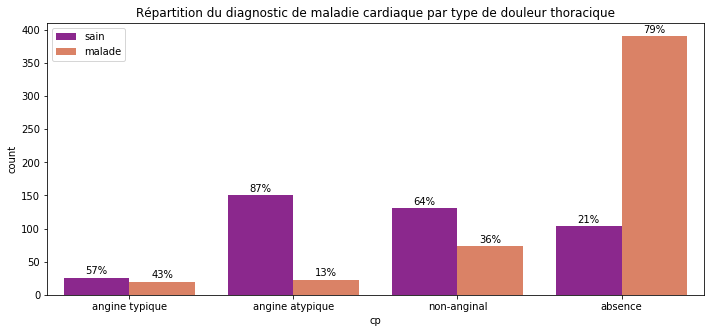

In [86]:
fig,ax=plt.subplots(figsize=(40,5))
plt.subplot(131)
ax=sns.countplot(x='cp',data=df,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 5, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 5, '{0:.0%}'.format(height_r/total), ha="center")
ax.legend(["sain","malade"])
ax.set_xticklabels(["angine typique","angine atypique","non-anginal", "absence"])
ax.set_title('Répartition du diagnostic de maladie cardiaque par type de douleur thoracique')

Text(0.5, 1.0, 'Type de douleur thoracique en fonction de l’âge')

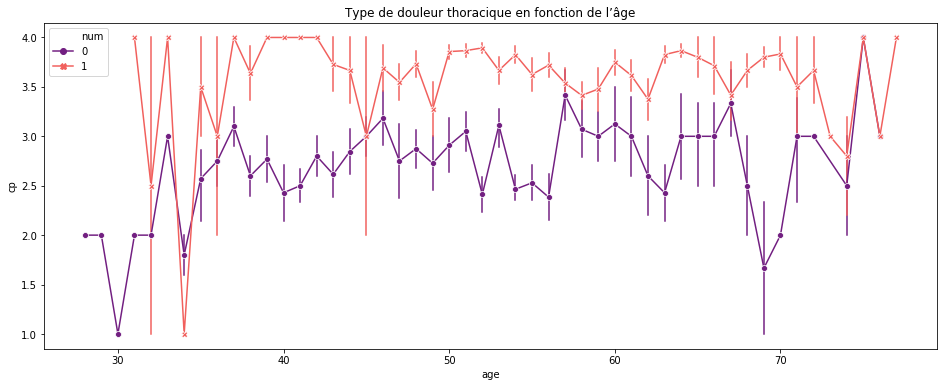

In [58]:
fig,ax=plt.subplots(figsize=(16,6))
sns.lineplot(y='cp',x='age',data=df,hue="num",style='num',palette='magma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Type de douleur thoracique en fonction de l’âge')

Text(0.5, 1.0, 'Répartition du diagnostic de maladie cardiaque par taux sérique de cholestérol ')

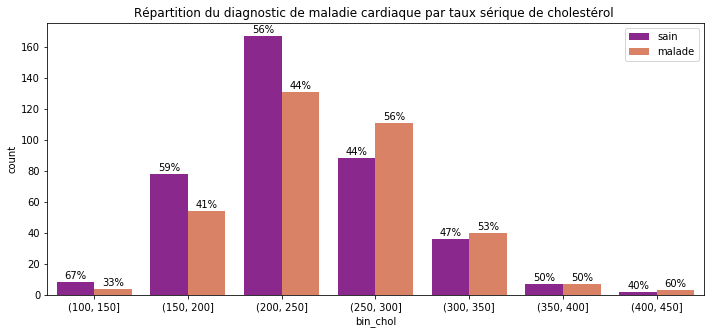

In [67]:
fig,ax=plt.subplots(figsize=(40,5))
plt.subplot(1, 3, 2)
cho_bins = [100,150,200,250,300,350,400,450]
df['bin_chol']=pd.cut(df['chol'], bins=cho_bins)
ax=sns.countplot(x='bin_chol',data=df,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 2, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 2, '{0:.0%}'.format(height_r/total), ha="center")
ax.legend(["sain","malade"])
ax.set_title("Répartition du diagnostic de maladie cardiaque par taux sérique de cholestérol ")

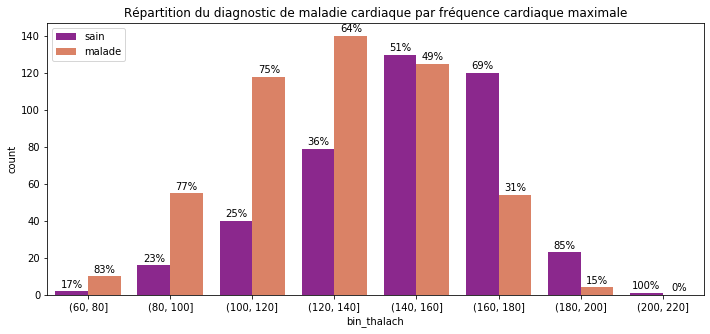

In [69]:
fig,ax=plt.subplots(figsize=(40,5))
plt.subplot(1, 3, 3)
thal_bins = [60,80,100,120,140,160,180,200,220]
df['bin_thalach']=pd.cut(df['thalach'], bins=thal_bins)
ax=sns.countplot(x='bin_thalach',data=df,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 2, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 2, '{0:.0%}'.format(height_r/total), ha="center")
ax.set_title("Répartition du diagnostic de maladie cardiaque par fréquence cardiaque maximale")
ax.legend(["sain","malade"])

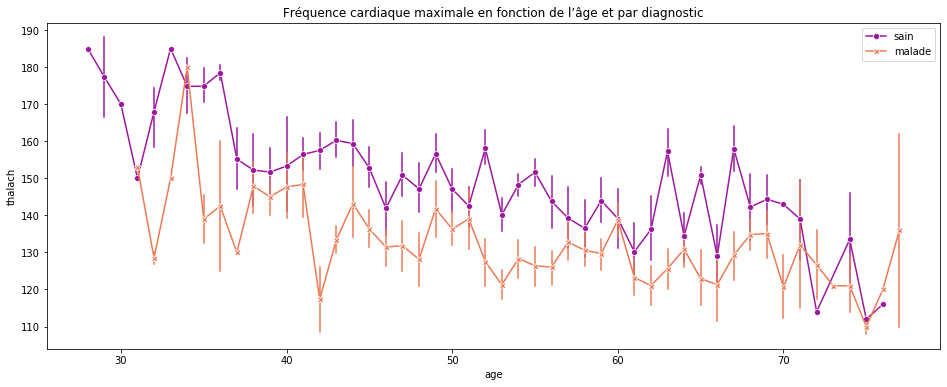

In [71]:
fig,ax=plt.subplots(figsize=(16,6))
sns.lineplot(y='thalach',x='age',data=df,hue="num",style='num',palette='plasma',markers=True, dashes=False,err_style="bars", ci=68)
plt.title('Fréquence cardiaque maximale en fonction de l’âge et par diagnostic')
ax.legend(["sain","malade"])

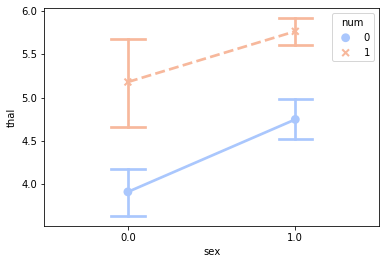

In [59]:
sns.pointplot(x='sex',y='thal',data=df,hue='num',markers=["o", "x"],linestyles=["-", "--"],capsize=.2,palette='coolwarm')

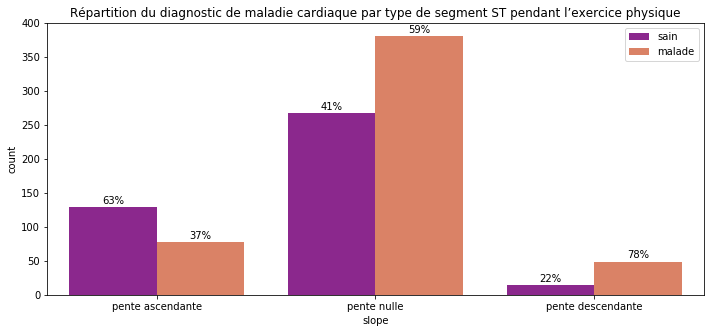

In [87]:
fig,ax=plt.subplots(figsize=(40,5))
plt.subplot(133)
ax=sns.countplot(x='slope',data=df,hue='num',palette='plasma')
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    if np.isnan(height_l):
        height_l=0
    if np.isnan(height_r):
        height_r=0
    total = height_l + height_r
    ax.text(left.get_x() + left.get_width()/2., height_l + 5, '{0:.0%}'.format(height_l/total), ha="center")
    ax.text(right.get_x() + right.get_width()/2., height_r + 5, '{0:.0%}'.format(height_r/total), ha="center")
ax.set_title('Répartition du diagnostic de maladie cardiaque par type de segment ST pendant l’exercice physique')
ax.set_xticklabels(["pente ascendante","pente nulle","pente descendante"])
ax.legend(["sain","malade"])

Text(0.5, 1.0, 'slope-oldpeak')

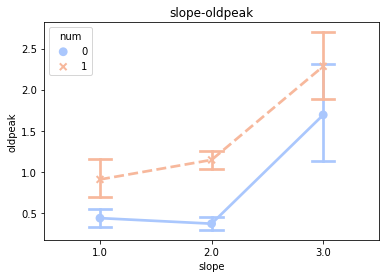

In [14]:
x4=sns.pointplot(x='slope',y='oldpeak',data=df,hue='num',markers=["o", "x"],linestyles=["-", "--"],capsize=.2,palette='coolwarm')
x4.set_title('slope-oldpeak')